In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('train_data.csv')

In [35]:
df.head()

,ts_start,lat,lon,ts_valid,temp,dewpt,slp,rh,vis,wspeed,...,DT_DATA_LAST_UPDATED,SURF_UNIQUE_ID,SURF_SURFACE_CONDITION,site_id,anonym_0,anonym_1,anonym_2,anonym_3,anonym_4,anonym_5
0,2019-11-01 05:00:00+00:00,40.69,-95.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-11-01 05:00:00+00:00,5120390.0,dry,65.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-01 05:00:00+00:00,40.69,-95.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-11-01 05:00:00+00:00,5120391.0,dry,65.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-01 05:00:00+00:00,40.69,-95.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-11-01 05:00:00+00:00,5120392.0,dry,65.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-01 05:00:00+00:00,40.69,-95.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-11-01 05:00:00+00:00,5120393.0,dry,65.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-01 05:15:00+00:00,40.69,-95.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-11-01 05:15:00+00:00,5120390.0,dry,65.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.dtypes

ts_start                   object
lat                       float64
lon                       float64
ts_valid                   object
temp                      float64
dewpt                     float64
slp                       float64
rh                        float64
vis                       float64
wspeed                    float64
wdir                      float64
wgust                     float64
pop                       float64
precip_rate               float64
FE_AZIMUTH                float64
FE_ZENITH                 float64
FE_ASCENSION              float64
FE_DECLINATION            float64
FE_HEIGHT                 float64
FE_SUN_ALTITUDE           float64
DT_DATA_LAST_UPDATED       object
SURF_UNIQUE_ID            float64
SURF_SURFACE_CONDITION     object
site_id                   float64
anonym_0                  float64
anonym_1                  float64
anonym_2                  float64
anonym_3                  float64
anonym_4                  float64
anonym_5      

In [37]:
df= df.drop(['ts_start','ts_valid','DT_DATA_LAST_UPDATED'],axis=1)

In [38]:
df = df.drop(['wgust'],axis=1)

In [39]:
df.isnull().sum()

lat                            0
lon                            0
temp                       33595
dewpt                      33595
slp                        33595
rh                         33595
vis                        33595
wspeed                     33595
wdir                       33595
pop                        33595
precip_rate                33595
FE_AZIMUTH                 33595
FE_ZENITH                  33595
FE_ASCENSION               33596
FE_DECLINATION             33596
FE_HEIGHT                  33596
FE_SUN_ALTITUDE            33596
SURF_UNIQUE_ID                 2
SURF_SURFACE_CONDITION    178481
site_id                        2
anonym_0                   33597
anonym_1                   33597
anonym_2                   33597
anonym_3                   33597
anonym_4                   33597
anonym_5                   33597
dtype: int64

In [40]:
df = df.dropna(axis=0)

In [41]:
obj_df = df.select_dtypes(include = ['object']).copy()
obj_df["SURF_SURFACE_CONDITION"] = obj_df["SURF_SURFACE_CONDITION"].astype('category')
obj_df["SURF_SURFACE_CONDITION"] = obj_df["SURF_SURFACE_CONDITION"].cat.codes
obj_df = obj_df.rename(columns={'SURF_SURFACE_CONDITION':'Surface_Condition'})

In [42]:
df = pd.concat([df,obj_df],axis=1)

In [43]:
df = df.drop(['SURF_SURFACE_CONDITION'],axis=1)

In [44]:
df.head()

,lat,lon,temp,dewpt,slp,rh,vis,wspeed,wdir,pop,...,FE_SUN_ALTITUDE,SURF_UNIQUE_ID,site_id,anonym_0,anonym_1,anonym_2,anonym_3,anonym_4,anonym_5,Surface_Condition
372,40.69,-95.78,3.0,0.0,1027.0,77.0,16.0,15.0,301.0,0.0,...,-54.323244,5120390.0,65.0,0.857639,0.470287,0.354746,-1.272234,-1.350717,-inf,2
373,40.69,-95.78,3.0,0.0,1027.0,77.0,16.0,15.0,301.0,0.0,...,-54.323244,5120391.0,65.0,0.631902,0.663599,0.224475,-1.215891,-1.283653,-inf,0
374,40.69,-95.78,3.0,0.0,1027.0,77.0,16.0,15.0,301.0,0.0,...,-54.323244,5120392.0,65.0,0.669398,0.582117,0.453220,-1.093798,-1.233569,-inf,0
375,40.69,-95.78,3.0,0.0,1027.0,77.0,16.0,15.0,301.0,0.0,...,-54.323244,5120393.0,65.0,0.739336,0.575585,0.270314,-1.095513,-1.241008,-inf,2
376,40.69,-95.78,3.0,0.0,1027.1,78.0,16.0,15.0,301.0,0.0,...,-56.450661,5120390.0,65.0,0.551431,0.624262,0.327368,-1.113647,-1.275418,-inf,2


In [45]:
df = df.replace([np.inf, -np.inf], np.nan)

In [46]:
df = df.drop(['anonym_5'],axis=1)

In [47]:
df = df.dropna(axis=0)

# 0-->dry  1-->icy  2-->wet

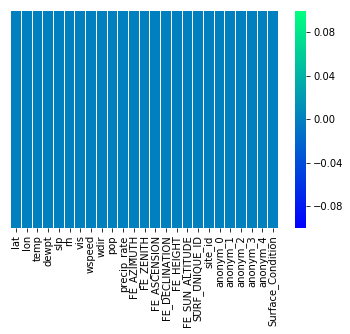

In [48]:
sns.heatmap(df.isnull(), yticklabels=False,cmap='winter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C810CCEB8>,
      dtype=object)

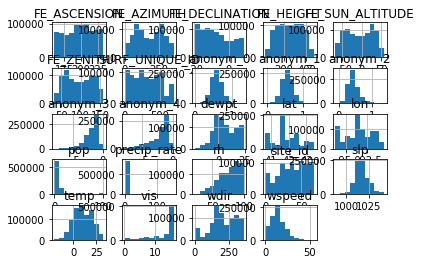

In [62]:
X.hist()

In [76]:
test = pd.read_csv('test_clean_conti.csv')

In [115]:
test = test[use_cols]

In [116]:
test.head(1)

,vis,FE_AZIMUTH,slp,precip_rate,wspeed,FE_ASCENSION,lat,pop,anonym_1,anonym_3,FE_DECLINATION,FE_HEIGHT,anonym_0,rh,anonym_2
0,7.0,320.369888,1005.9,0.0,1.0,233.947649,41.02,0.0,0.457492,-1.974396,-19.289585,162.551725,0.479819,93.0,0.715955


In [114]:
X.head(1)

,vis,FE_AZIMUTH,slp,precip_rate,wspeed,FE_ASCENSION,lat,pop,anonym_1,anonym_3,FE_DECLINATION,FE_HEIGHT,anonym_0,rh,anonym_2
838977,16.0,265.722672,1012.09,0.0,15.0,164.181567,42.0,0.0,0.369401,-4.118627,6.727652,436.141078,0.486593,69.0,0.345329


In [78]:
test.shape,X.shape

((53616, 16), (824395, 15))

In [79]:
test = test.drop(['row_id'],axis=1)

In [91]:
df = df.sample(500000)

In [92]:
X = df.drop(['Surface_Condition'],axis=1)

In [93]:
use_cols = {'lat','slp', 'rh', 'vis', 'wspeed','pop', 'precip_rate','FE_AZIMUTH','FE_ASCENSION',
       'FE_DECLINATION', 'FE_HEIGHT','anonym_0', 'anonym_1', 'anonym_2', 'anonym_3'}

In [94]:
X =X[use_cols]

In [95]:
y = df['Surface_Condition']

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [106]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier


In [107]:
clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1))

In [ ]:
clf.fit(X, y)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=-1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [112]:
print("Coefficient of determination R^2 <-- on train set: {}".format(clf.score(X, y)))

Coefficient of determination R^2 <-- on train set: 0.867842


In [117]:
y_pred = clf.predict(test)

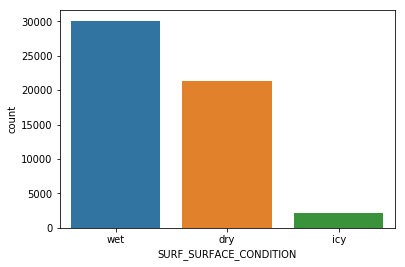

In [118]:
y_pred = pd.DataFrame(y_pred)
prediction = y_pred
prediction = prediction.rename(columns={0:'SURF_SURFACE_CONDITION'})
prediction = prediction.replace(0,'dry')
prediction = prediction.replace(1,'icy')
prediction = prediction.replace(2,'wet')
sns.countplot(x='SURF_SURFACE_CONDITION',data=prediction)

In [120]:
export_csv = prediction.to_csv(r'y_pred.csv',index=None,header=True)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
clf = RandomForestClassifier(n_jobs=-1)


In [99]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [100]:
print("Coefficient of determination R^2 <-- on train set: {}".format(clf.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9628766401652469


In [82]:

#print("Coefficient of determination R^2 <-- on train set: {}".format(clf.score(X_test, y_test)))

In [27]:
#from sklearn.model_selection import cross_val_score
#score=cross_val_score(clf,X,y,cv=5)

In [28]:
#score.mean()

0.6643393671605073

In [101]:
y_pred = clf.predict(test)
y_pred = pd.DataFrame(y_pred)
#print("Acc score is :",accuracy_score(y_pred,y_test)*100)

In [102]:
prediction = y_pred
prediction = prediction.rename(columns={0:'SURF_SURFACE_CONDITION'})
prediction = prediction.replace(0,'dry')
prediction = prediction.replace(1,'icy')
prediction = prediction.replace(2,'wet')

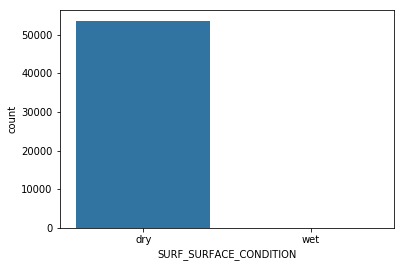

In [105]:
sns.countplot(x='SURF_SURFACE_CONDITION',data=prediction)

In [84]:
export_csv = y_pred.to_csv(r'y_pred.csv',index=None,header=True)

In [74]:
from sklearn.metrics import f1_score

In [75]:
f1_score(y_test, y_pred, average='macro')

0.8209466736112899

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
vmgj

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
xg_random.fit(X_train,y_train)